# __Spotify Top Songs Analysis for 2023__

__Dataset__: _https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023_


## Motivation & Objectives

In this exercise, we will be
1. Trying to find what contribute to the ranks and stream numbers
2. Trying to see if stream numbers are predictable by a machine learning model, using the features provided

## Findings

The stream numbers generally manifest nearly no linear correlation to all of the numerical continuous features. The strongest linearly correlated features are 

A vanilla XGBoost is employed in attempted to model as well the potential non-linearities. 
The vanilla model successfully predicted streams with a lowest 0.138 RMSE, performed at its best with the aforementioned 2 features and learning rate (eta) of 0.0333. 

## Feature Definition

__track name__: Name of the song

__artist(s) name__: Name of the artist(s) of the song

__artist count__: Number of artists contributing to the song

__released year__: Year when the song was released

__released month__: Month when the song was released

__released day__: Day of the month when the song was released

__in spotify playlists__: Number of Spotify playlists the song is included in

__in spotify charts__: Presence and rank of the song on Spotify charts

__streams__: Total number of streams on Spotify; i.e. stream numbers

__in apple playlists__: Number of Apple Music playlists the song is included in

__in apple charts__: Presence and rank of the song on Apple Music charts

__in deezer playlists__: Number of Deezer playlists the song is included in

__in deezer charts__: Presence and rank of the song on Deezer charts

__in shazam charts__: Presence and rank of the song on Shazam charts

__bpm__: Beats per minute, a measure of song tempo

__key__: Key of the song

__mode__: Mode of the song (major or minor)

__danceability%__: Percentage indicating how suitable the song is for dancing; Spotify Attributes

__valence%__: Positivity of the song's musical content; Spotify Attributes

__energy%__: Perceived energy level of the song; Spotify Attributes

__acousticness%__: Amount of acoustic sound in the song; Spotify Attributes

__instrumentalness%__: Amount of instrumental content in the song; Spotify Attributes

__liveness%__: Presence of live performance elements; Spotify Attributes

__speechiness%__: Amount of spoken words in the song; Spotify Attributes



## Data Reading

In [2]:
# Load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
pd.options.display.max_columns = 30

In [3]:
### Load Dataset
df = pd.read_csv('./spotify-2023.csv',encoding='ISO-8859-1')
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [4]:
### Quick look
df.info()
print("shape: ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
### Fix datatype
df["streams"]= pd.to_numeric(df["streams"], errors = 'coerce')

In [6]:
### Check NA 
print(df.isna().sum()) # or df_normalised.isna().any()
# All NAs are in Keys and in_shazam_charts

# glimpse int rows that has isna in key
df[df.key.isna()]



track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,227,95,24,"1,173",78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,98,582,2,73,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,1.231224e+08,22,33,34,7,184,120,NaN,Major,81,63,68,11,0,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,6.515620e+07,82,145,65,16,"1,133",144,NaN,Major,77,75,58,52,0,23,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,2.842166e+08,165,10,177,4,73,126,NaN,Major,67,49,77,11,0,19,11
901,After LIKE,IVE,1,2022,8,22,767,12,2.655488e+08,20,129,11,0,12,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,53,113,12,0,137,NaN,Major,74,71,89,24,61,15,5
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,3,15,0,0,110,NaN,Major,48,15,31,80,22,12,4


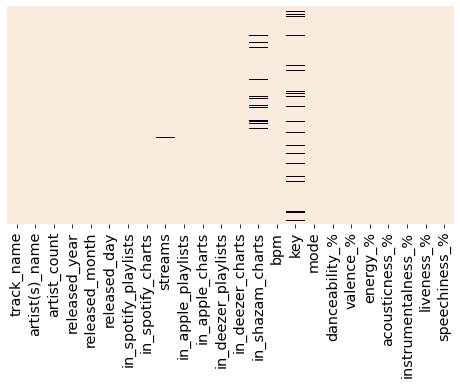

In [7]:
### High level checking NA mutual exclusivity
def plot_na_matrix(df, figsize=(8,4)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_na = df.isna()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_na, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_na_matrix(df)

In [8]:
### Drop na
df = df.dropna()
df.shape

(816, 24)

In [9]:
### Renaming columns of interest
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}
df.rename(columns=re_col, inplace=True)


### Isolating numerical features
numerical_features = df.select_dtypes(exclude = "object").columns
numerical_features = list(numerical_features)
numerical_features 



['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_charts',
 'bpm',
 'danceability',
 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']

In [58]:
### Normalise "streams" (Not Standardization this time because we don't want the data to centre around 0)
from sklearn.preprocessing import MinMaxScaler
df_normalised = df[:] #python trick to replace copy
df_normalised['streams'] = MinMaxScaler().fit_transform(df_normalised[['streams']])


In [10]:
### Converting Discrete Features to one-hot
#df_normalised = pd.get_dummies(df_normalised_normalised, columns=['key', 'mode'], prefix=['key', 'mode'])

# to binary
#binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

#for column in binary_columns:
#    df[column] = df[column].astype(int) 

In [11]:
#df.head()

## Exploratory Data Analysis

In [92]:
### Visualise distribution of streams

fig = px.histogram(df, x = "streams", marginal = "rug" ,title = f'Streams Distribution', color = 'mode')
fig.add_shape(type = "line", x0 = df.streams.mean(), x1= df.streams.mean(), y0 = 0, y1 = 200, line= {'color':'red', 'dash':'dash'})
fig.add_shape(type = "line", x0 = df.streams.median(), x1= df.streams.median(), y0 = 0, y1 = 200, line= {'color':'red', 'dash':'dash'})
fig.add_trace(
    go.Scatter(
        x=[df['streams'].mean(), df['streams'].median()], y=[-10, -10],
        text=["Mean","Median"],
        mode="text"
    ))

fig.show()


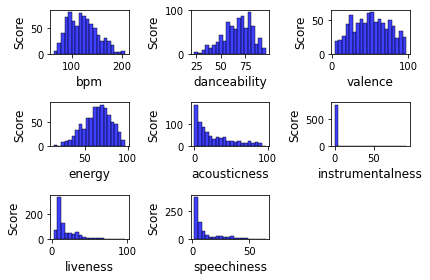

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,2.454657,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,5.399650,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,2.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [112]:
### column EDA

columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

#plt.figure(figsize=(9,9))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

df.describe()

                    streams  in_spotify_charts  in_apple_charts  \
streams            1.000000           0.214034         0.269137   
in_spotify_charts  0.214034           1.000000         0.556509   
in_apple_charts    0.269137           0.556509         1.000000   
in_deezer_charts   0.184329           0.566020         0.366295   
bpm               -0.025694           0.028496         0.026531   
danceability      -0.093268           0.050623        -0.027371   
valence           -0.051014           0.050862         0.044229   
energy            -0.036499           0.105217         0.129793   
acousticness      -0.005751          -0.073482        -0.097803   
instrumentalness  -0.033039          -0.005963        -0.000615   
liveness          -0.056664          -0.026655        -0.007271   
speechiness       -0.099968          -0.094726        -0.147513   

                   in_deezer_charts       bpm  danceability   valence  \
streams                    0.184329 -0.025694     -0.09

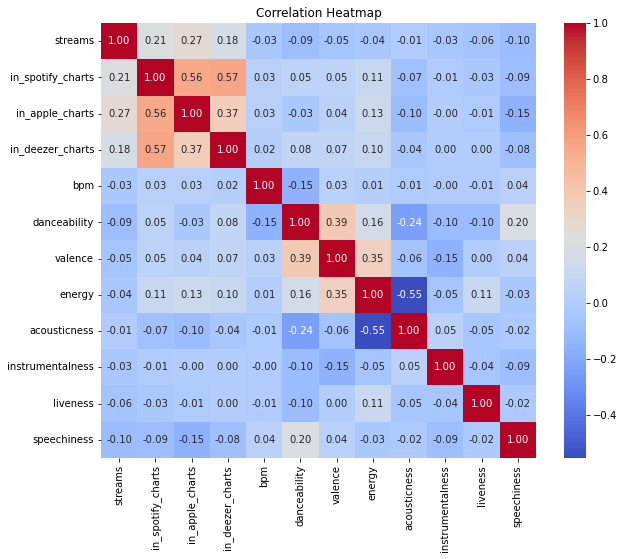

In [116]:
### Correlation Analysis
columns_to_correlate = ['streams','in_spotify_charts','in_apple_charts','in_deezer_charts','bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

correlation_matrix = df_normalised[columns_to_correlate].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

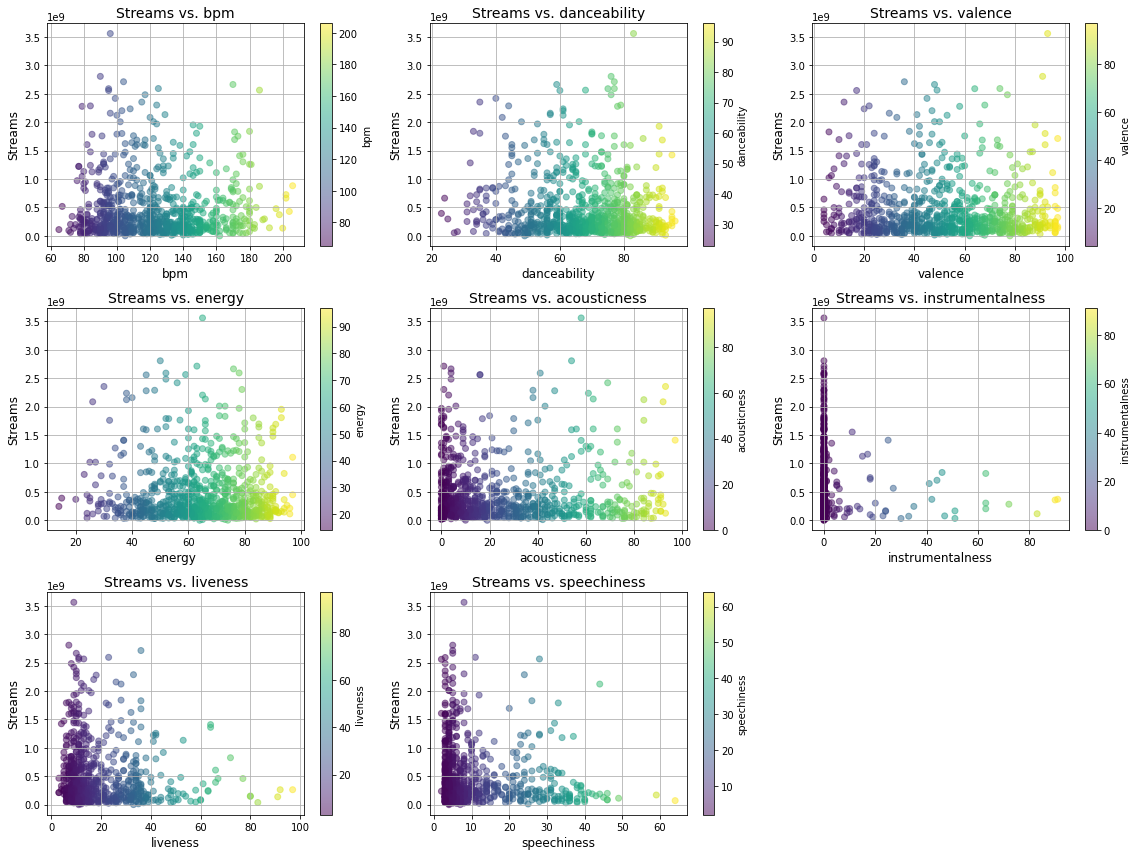

In [114]:
### Scatter plot
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df[column], df['streams'], c=df[column], cmap=colormap, alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

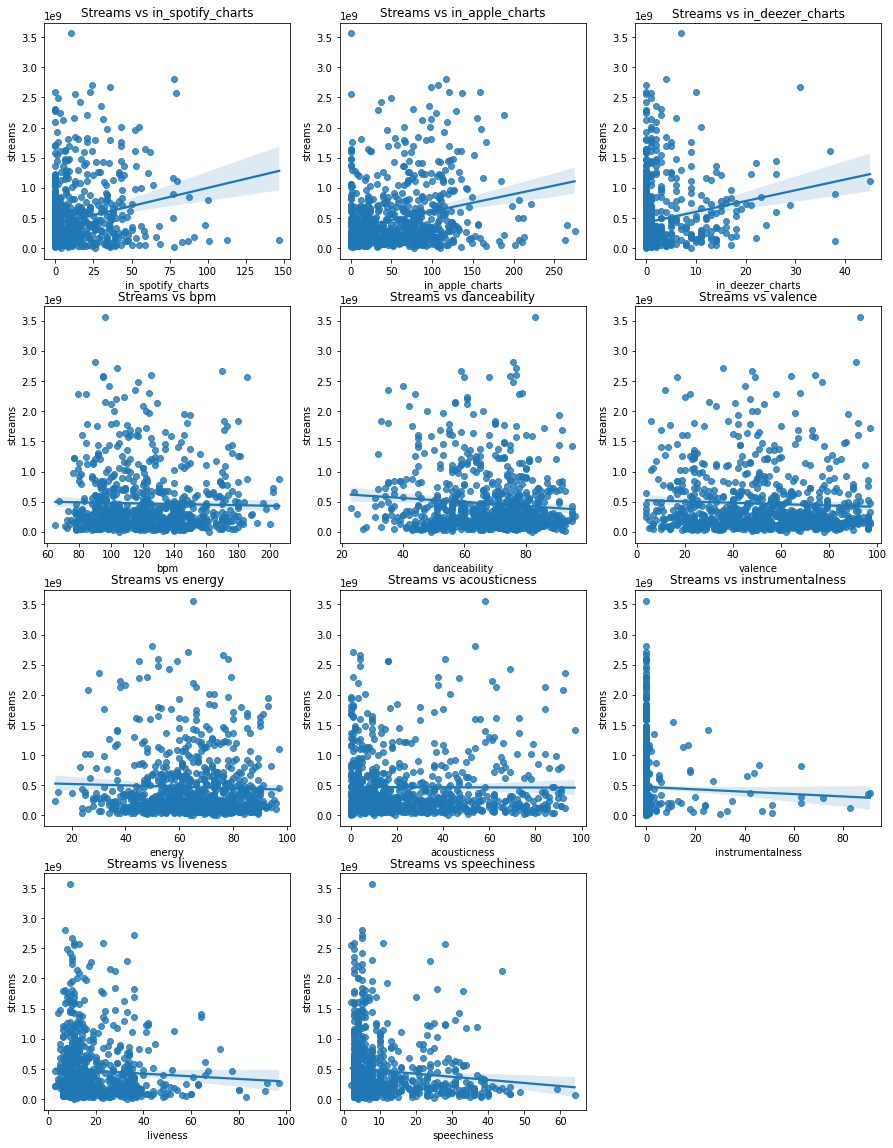

In [117]:
### Linear regression

fig = plt.figure(figsize = (15,20))
for n in range(1,12):
    axis = "ax{}".format(n)
    axis = fig.add_subplot(4,3,n)
    sns.regplot(x = columns_to_correlate[n] , y = 'streams', data = df)
    plt.title('Streams vs '+ columns_to_correlate[n])
plt.tight_layout
plt.show()

## Model & Prediction

### PCA improve the result?
### XGBOOST


In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE

In [65]:
columns_to_correlate = ['streams','in_spotify_charts','in_apple_charts','in_deezer_charts','bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
columns_to_correlate.remove("streams")
print(columns_to_correlate)

['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']


In [118]:
### Initial Vanilla Univariate Testing model

def XGB(df, x, y, eta):
    xgb = XGBRegressor(learning_rate = eta)
    x_train, x_test, y_train, y_test = train_test_split(
        df[[x]], df[y], test_size = 0.33, random_state = 42
    )
    xgb.fit(x_train, y_train)
    y_head = xgb.predict(x_test)

    return MSE(y_test, y_head) ** 0.5 #RMSE
    # does not use r2 score with xgb cause it cannot compare how good the parameter in predicting the unseen


RMSE_res = {}

for col in columns_to_correlate:
    rmses = []
    range_eta = range(1,10)
    for e in range_eta:
        rmse = XGB(df_normalised, col, "streams", 1/(10*e))
        rmses.append(rmse)
    RMSE_res[col] = rmses

err_metrics = pd.DataFrame(data=RMSE_res)
err_metrics['e'] = list(range_eta)

# generate a graph to display RMSE values for each variable
fig = px.line(err_metrics, x='e', y=err_metrics.columns,
             labels = {'e':'1/(10*eta)',
                       'value':'Root-mean-square error (RMSE)'},
             title = 'Perfomance of Univariate Vanilla Models')

fig.update_layout(yaxis_tickformat = '')
fig.show()
    



In [82]:
ranked_x[0:0]

[]

In [80]:
### Testing Multivariate with 5 Features Producting lowest RMSE, by rank
ranked_x = ["in_spotify_charts", "in_apple_charts", "bpm", "speechiness", "in_deezer_charts"]

def XGB(df, x, y, eta):
    xgb = XGBRegressor(learning_rate = eta)
    x_train, x_test, y_train, y_test = train_test_split(
        df[x], 
        df[y], 
        test_size = 0.33, 
        random_state = 42
    )
    xgb.fit(x_train, y_train)
    y_head = xgb.predict(x_test)

    return MSE(y_test, y_head) ** 0.5 #RMSE
    # does not use r2 score with xgb cause it cannot compare how good the parameter in predicting the unseen

RMSE_res = {}

for col in range(2,len(ranked_x)+1):
    rmses = []
    range_eta = range(1,10)
    for e in range_eta:
        rmse = XGB(df_normalised, ranked_x[:col], "streams", 1/(10*e))
        rmses.append(rmse)
    RMSE_res[col] = rmses

err_metrics = pd.DataFrame(data=RMSE_res)
err_metrics['e'] = list(range_eta)

# generate a graph to display RMSE values for each variable
fig = px.line(err_metrics, x='e', y=err_metrics.columns,
             labels = {'e':'1/(10*eta)',
                       'value':'Root-mean-square error (RMSE)',
                       'variable':'number of variables'},
             title = 'Perfomance of Multivariate Vanilla Models')

fig.update_layout(yaxis_tickformat = '')
fig.show()

## Further Discussions

1. Is there any correlations between streams and categorical features, such as modes, keys and singers?
2. Can we further optimise the model with stratification during training?
3. Can we use grid search in optimizing the model?
